In [1]:
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pygad.nn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers
from tensorflow.keras import callbacks
from tensorflow.keras.layers import (Input, Dense, concatenate, LeakyReLU)

print(tf.__version__)



column_names = [
    "Core",
    "Inner",
    "Outer",
    "405","410","415","420","425","430","435", "440","445", "450" ,"455","460","465","470","475","480","485","490","495","500",
    "505","510","515","520","525","530","535", "540","545", "550" ,"555","560","565","570","575","580","585","590","595","600",
    "605","610","615","620","625","630","635", "640","645","650" ,"655","660","665","670","675","680","685","690","695","700",
    "705","710","715","720","725","730","735","740", "745","750" ,"755","760","765","770","775","780","785","790","796","800"
]
raw_dataset = pd.read_csv(
    'C:/Users/OIDL-Jang/Documents/Test_Set_Wavelength_2022-0117 15-00-55.csv',
    names=column_names,
    # encoding='cp949'
)
raw_data_dropna = raw_dataset.dropna()
dataset = raw_data_dropna.copy()

print(dataset)


2.5.0
       Core  Inner  Outer       405       410       415       420       425  \
0      1.73   2.82   0.61  0.000382  0.000414  0.000448  0.000485  0.000525   
1      1.93   2.00   0.49  0.000341  0.000368  0.000397  0.000429  0.000463   
6      1.68   2.98   2.72  0.000539  0.000589  0.000644  0.000705  0.000772   
7      0.17   2.65   3.84  0.642560  0.988060  1.000000  0.685670  0.341110   
9      0.88   2.07   0.78  0.000924  0.001030  0.001150  0.001287  0.001445   
...     ...    ...    ...       ...       ...       ...       ...       ...   
29993  1.76   0.25   3.46  0.000627  0.000689  0.000757  0.000834  0.000919   
29994  0.69   2.11   0.33  0.001167  0.001313  0.001483  0.001681  0.001912   
29995  1.73   2.78   2.79  0.000528  0.000577  0.000630  0.000690  0.000755   
29996  1.81   2.21   1.43  0.000448  0.000487  0.000529  0.000576  0.000627   
29998  2.00   0.56   3.46  0.000543  0.000593  0.000649  0.000710  0.000779   

            430       435  ...       755     

In [2]:

# print(dataset.tail())

y_all = dataset.iloc[:,:3]
x_all = dataset.iloc[:,3:]

x_train_all, x_test, y_train_all, y_test = train_test_split(x_all, y_all, test_size = 0.4)
# x_train_all, x_test = train_test_split(x_all, test_size = 0.2)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, test_size = 0.2)
#train_dataset = dataset.sample(frac=0.8, random_state=0)
#test_dataset = dataset.drop(train_dataset.index)

# print(x_all)

# print(x_train_all)
# print(x_train)
print(x_test)
print(y_test)

            405       410       415       420       425       430       435  \
23665  0.000499  0.000544  0.000594  0.000648  0.000708  0.000775  0.000849   
24210  0.000480  0.000523  0.000570  0.000621  0.000678  0.000741  0.000810   
27292  0.000434  0.000471  0.000512  0.000556  0.000605  0.000659  0.000718   
13092  0.001324  0.001499  0.001704  0.001944  0.002229  0.002568  0.002976   
20762  0.000801  0.000887  0.000985  0.001095  0.001220  0.001362  0.001525   
...         ...       ...       ...       ...       ...       ...       ...   
11696  0.000727  0.000803  0.000888  0.000983  0.001091  0.001213  0.001352   
10530  0.000531  0.000580  0.000634  0.000693  0.000759  0.000833  0.000915   
3665   0.000806  0.000893  0.000991  0.001103  0.001230  0.001374  0.001540   
18517  0.001373  0.001559  0.001776  0.002033  0.002338  0.002704  0.003146   
22923  0.222760  0.531720  0.888060  1.000000  0.771860  0.430050  0.189930   

            440       445       450  ...       755 

In [3]:
print(x_valid)

            405       410       415       420       425       430       435  \
11061  0.000898  0.000999  0.001114  0.001245  0.001395  0.001567  0.001765   
5306   0.000386  0.000418  0.000453  0.000490  0.000532  0.000577  0.000626   
27353  0.863660  1.000000  0.763630  0.407930  0.170340  0.067945  0.033151   
25234  0.000567  0.000621  0.000680  0.000746  0.000819  0.000901  0.000992   
16717  0.003073  0.003677  0.004448  0.005450  0.006781  0.008597  0.011172   
...         ...       ...       ...       ...       ...       ...       ...   
15538  0.000472  0.000514  0.000559  0.000610  0.000665  0.000726  0.000794   
26299  0.000983  0.001099  0.001230  0.001382  0.001556  0.001758  0.001994   
28265  0.002373  0.002785  0.003294  0.003932  0.004743  0.005794  0.007184   
21609  0.002789  0.003310  0.003966  0.004805  0.005898  0.007357  0.009358   
7792   0.000447  0.000486  0.000529  0.000575  0.000627  0.000683  0.000745   

            440       445       450  ...       755 

In [4]:
scaler = MinMaxScaler()
nx_train = scaler.fit_transform(x_train)
x_valide = scaler.transform(x_valid)
nx_test  = scaler.transform(x_test)


In [5]:
# print(nx_train)

In [6]:
input_shape = Input(shape = (80,), name = "Thickness")
hidden1 = Dense(25, activation = 'LeakyReLU', name = "Hidden1")(input_shape)
hidden2 = Dense(25, activation = 'LeakyReLU', name = "Hidden2")(hidden1)
hidden3 = Dense(25, activation = 'LeakyReLU', name = "Hidden3")(hidden2)
# hidden4 = Dense(50, activation = 'LeakyReLU', name = "Hidden4")(hidden3)
# hidden5 = Dense(200, activation = 'LeakyReLU', name = "Hidden5")(hidden4)
# hidden6 = Dense(200, activation = 'LeakyReLU', name = "Hidden6")(hidden5)
# hidden7 = Dense(200, activation = 'LeakyReLU', name = "Hidden7")(hidden6)
# hidden8 = Dense(200, activation = 'LeakyReLU', name = "Hidden8")(hidden7)
# hidden9 = Dense(200, activation = 'LeakyReLU', name = "Hidden9")(hidden8)
# hidden10 = Dense(200, activation = 'LeakyReLU', name = "Hidden10")(hidden9)
output = Dense(3, name = "Output")(hidden3)


model = keras.Model(inputs=input_shape, outputs = output)

In [7]:
model.compile(loss="mse", optimizer="Adam", metrics=["mse"],)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Thickness (InputLayer)       [(None, 80)]              0         
_________________________________________________________________
Hidden1 (Dense)              (None, 25)                2025      
_________________________________________________________________
Hidden2 (Dense)              (None, 25)                650       
_________________________________________________________________
Hidden3 (Dense)              (None, 25)                650       
_________________________________________________________________
Output (Dense)               (None, 3)                 78        
Total params: 3,403
Trainable params: 3,403
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.evaluate(nx_test,y_test,batch_size=32)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 10, restore_best_weights = True)


316/316 [==============================] - 0s 370us/step - loss: 3.6642 - mse: 3.6642


In [9]:

history = model.fit( nx_train, y_train,
    epochs=5000,
    batch_size = 32,
    validation_data = (x_valid,y_valid),
    callbacks=[early_stop],
)

pygad.nn


Epoch 1/5000
379/379 [==============================] - 1s 987us/step - loss: 0.8127 - mse: 0.8127 - val_loss: 0.6319 - val_mse: 0.6319
Epoch 2/5000
379/379 [==============================] - 0s 683us/step - loss: 0.6118 - mse: 0.6118 - val_loss: 0.6223 - val_mse: 0.6223
Epoch 3/5000
379/379 [==============================] - 0s 689us/step - loss: 0.6081 - mse: 0.6081 - val_loss: 0.6174 - val_mse: 0.6174
Epoch 4/5000
379/379 [==============================] - 0s 715us/step - loss: 0.6060 - mse: 0.6060 - val_loss: 0.6286 - val_mse: 0.6286
Epoch 5/5000
379/379 [==============================] - 0s 723us/step - loss: 0.6066 - mse: 0.6066 - val_loss: 0.6179 - val_mse: 0.6179
Epoch 6/5000
379/379 [==============================] - 0s 683us/step - loss: 0.6055 - mse: 0.6055 - val_loss: 0.6163 - val_mse: 0.6163
Epoch 7/5000
379/379 [==============================] - 0s 699us/step - loss: 0.6048 - mse: 0.6048 - val_loss: 0.6162 - val_mse: 0.6162
Epoch 8/5000
379/379 [==========================

<module 'pygad.nn' from 'C:\\Python39\\lib\\site-packages\\pygad\\nn\\__init__.py'>

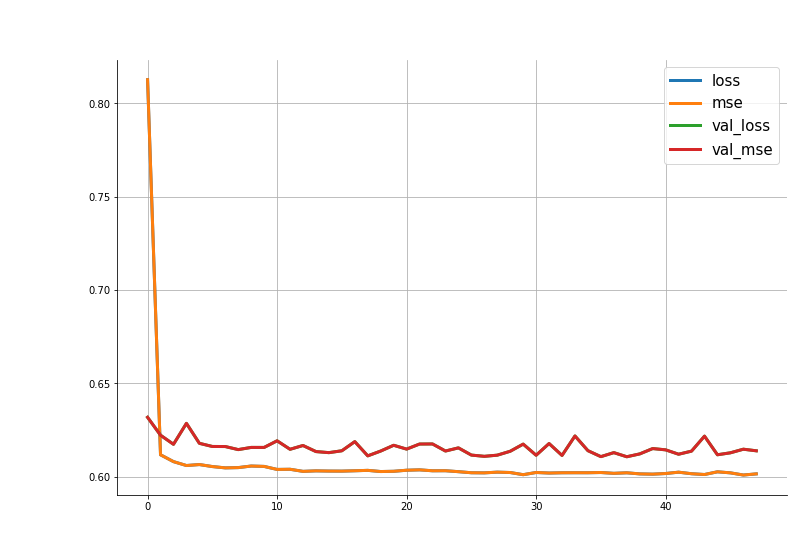

In [10]:
def Drawing_Scalars(history_name):

    history_WL = pd.DataFrame(history_name.history)
    history_WL.plot(figsize=(12,8),linewidth =3)

    plt.grid(True)

    plt.legend(loc ="upper right",fontsize = 15)

    plt.title("Learning Curve",fontsize=30, pad=30, color = 'white')
    plt.xlabel("Epoch",fontsize = 20, loc='center',labelpad = 20,color = 'white')
    plt.ylabel('Variable',fontsize=20,rotation= 0, loc = 'center', labelpad = 40,color = 'white')

    ax = plt.gca()
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)

    plt.show()


Drawing_Scalars(history)



In [11]:
# test_predictions = model.predict(x_valid).flatten()

# tf.size(test_predictions)

# print(test_predictions)

results = model.evaluate(nx_test, y_test,batch_size = 128)

predictions = model.predict(nx_test)

print(predictions)



79/79 [==============================] - 0s 409us/step - loss: 0.6039 - mse: 0.6039
[[1.7467222  1.6956799  2.0073993 ]
 [1.7422811  1.7433994  1.6947055 ]
 [1.7138588  1.7328229  1.0421419 ]
 ...
 [1.186459   1.5037391  2.2758205 ]
 [0.8841902  1.5456152  2.2271564 ]
 [0.35312492 1.9599249  2.2783253 ]]


In [12]:
# import numpy as np
# import sys

# np.set_printoptions(threshold=sys.maxsize)
# print(predictions)

print(x_test)
print(y_test)

            405       410       415       420       425       430       435  \
23665  0.000499  0.000544  0.000594  0.000648  0.000708  0.000775  0.000849   
24210  0.000480  0.000523  0.000570  0.000621  0.000678  0.000741  0.000810   
27292  0.000434  0.000471  0.000512  0.000556  0.000605  0.000659  0.000718   
13092  0.001324  0.001499  0.001704  0.001944  0.002229  0.002568  0.002976   
20762  0.000801  0.000887  0.000985  0.001095  0.001220  0.001362  0.001525   
...         ...       ...       ...       ...       ...       ...       ...   
11696  0.000727  0.000803  0.000888  0.000983  0.001091  0.001213  0.001352   
10530  0.000531  0.000580  0.000634  0.000693  0.000759  0.000833  0.000915   
3665   0.000806  0.000893  0.000991  0.001103  0.001230  0.001374  0.001540   
18517  0.001373  0.001559  0.001776  0.002033  0.002338  0.002704  0.003146   
22923  0.222760  0.531720  0.888060  1.000000  0.771860  0.430050  0.189930   

            440       445       450  ...       755 

In [13]:
score = model.evaluate(x_test,y_test,verbose=1)
print(score[1])

316/316 [==============================] - 0s 624us/step - loss: 0.6056 - mse: 0.6056
0.6055898666381836


In [14]:
import numpy as np
print(x_test)

# wave_range = np.arange(405,805,5)
# plt.scatter(wave_range,predictions[5040,:])


            405       410       415       420       425       430       435  \
23665  0.000499  0.000544  0.000594  0.000648  0.000708  0.000775  0.000849   
24210  0.000480  0.000523  0.000570  0.000621  0.000678  0.000741  0.000810   
27292  0.000434  0.000471  0.000512  0.000556  0.000605  0.000659  0.000718   
13092  0.001324  0.001499  0.001704  0.001944  0.002229  0.002568  0.002976   
20762  0.000801  0.000887  0.000985  0.001095  0.001220  0.001362  0.001525   
...         ...       ...       ...       ...       ...       ...       ...   
11696  0.000727  0.000803  0.000888  0.000983  0.001091  0.001213  0.001352   
10530  0.000531  0.000580  0.000634  0.000693  0.000759  0.000833  0.000915   
3665   0.000806  0.000893  0.000991  0.001103  0.001230  0.001374  0.001540   
18517  0.001373  0.001559  0.001776  0.002033  0.002338  0.002704  0.003146   
22923  0.222760  0.531720  0.888060  1.000000  0.771860  0.430050  0.189930   

            440       445       450  ...       755 

[[1.7467222  1.6956799  2.0073993 ]
 [1.7422811  1.7433994  1.6947055 ]
 [1.7138588  1.7328229  1.0421419 ]
 ...
 [1.186459   1.5037391  2.2758205 ]
 [0.8841902  1.5456152  2.2271564 ]
 [0.35312492 1.9599249  2.2783253 ]]


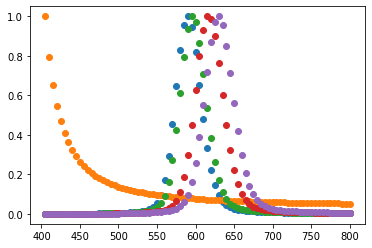

In [15]:
import numpy as np
from sklearn.impute import SimpleImputer
wave_range = np.arange(405,805,5)
yy = x_test.iloc[0,:].values
# Emission = imputer.transform(x_test.iloc[0,:])
plt.scatter(wave_range,x_test.iloc[5040,:])
plt.scatter(wave_range,x_test.iloc[5039,:])
plt.scatter(wave_range,x_test.iloc[5038,:])
plt.scatter(wave_range,x_test.iloc[1,:])
plt.scatter(wave_range,x_test.iloc[2,:])
print(predictions)



In [17]:
print(x_valid)

            405       410       415       420       425       430       435  \
11061  0.000898  0.000999  0.001114  0.001245  0.001395  0.001567  0.001765   
5306   0.000386  0.000418  0.000453  0.000490  0.000532  0.000577  0.000626   
27353  0.863660  1.000000  0.763630  0.407930  0.170340  0.067945  0.033151   
25234  0.000567  0.000621  0.000680  0.000746  0.000819  0.000901  0.000992   
16717  0.003073  0.003677  0.004448  0.005450  0.006781  0.008597  0.011172   
...         ...       ...       ...       ...       ...       ...       ...   
15538  0.000472  0.000514  0.000559  0.000610  0.000665  0.000726  0.000794   
26299  0.000983  0.001099  0.001230  0.001382  0.001556  0.001758  0.001994   
28265  0.002373  0.002785  0.003294  0.003932  0.004743  0.005794  0.007184   
21609  0.002789  0.003310  0.003966  0.004805  0.005898  0.007357  0.009358   
7792   0.000447  0.000486  0.000529  0.000575  0.000627  0.000683  0.000745   

            440       445       450  ...       755 

In [25]:
print(y_test)
print(predictions)

       Core  Inner  Outer
23665  1.88   2.09   2.53
24210  2.02   2.38   3.02
27292  1.89   2.32   1.49
13092  0.71   1.05   0.24
20762  1.29   1.85   4.06
...     ...    ...    ...
11696  1.31   0.29   1.14
10530  1.12   2.55   0.33
3665   1.14   2.06   1.98
18517  0.70   2.48   0.86
22923  0.35   2.00   3.94

[10082 rows x 3 columns]
[[1.7467222  1.6956799  2.0073993 ]
 [1.7422811  1.7433994  1.6947055 ]
 [1.7138588  1.7328229  1.0421419 ]
 ...
 [1.186459   1.5037391  2.2758205 ]
 [0.8841902  1.5456152  2.2271564 ]
 [0.35312492 1.9599249  2.2783253 ]]


array([[1.6560289, 1.5345199, 2.3874595],
       [0.6516586, 1.5548751, 2.2198157],
       [1.7628788, 1.761275 , 0.8445606],
       ...,
       [1.7510579, 1.7563422, 1.3468722],
       [1.3126909, 1.5096233, 2.3077028],
       [0.7495056, 1.4540057, 2.173284 ]], dtype=float32)